# **The Impact of Energy Consumption and GDP on CO2 Emissions**

# Introduction

Undoubtedly, global advancements and rapid economic growth have significantly enhanced human life by improving the quality of life for many, facilitating greater access to essential services and products in every aspect of life.  These strides in development have undoubtedly brought about positive changes in the quality of life for many. However, alongside these advancements lies a darker side a detrimental impact on the environment. Climate change, global warming and pollution are among the adverse effects attributed to unchecked development.

Global industrialization has facilitated rapid economic growth worldwide, bolstered by improvements in energy consumption. However, this surge in growth has resulted in a notable increase in carbon dioxide emissions. Since the 1960s, there has been a heightened global focus on environmental concerns, leading to the convening of various environmental conferences such as the "Rio," "Kyoto," and "Copenhagen" Conferences. Presently, China, propelled by its high-energy consumption economic model, stands as the world's largest consumer of fossil fuels, with per capita carbon emissions on the rise (Zou, Zhang 2020, par. 1).

In this analysis, I will explore the relationship between CO2 emissions, GDP, and energy consumption. Through eight key questions, I aim to provide insights and estimates regarding this complex issue. Three datasets will be utilized in this analysis, with the hope that they will prove valuable in uncovering the answers sought.

**Questions**: 

1. Is there any evidence indicating a relationship between CO2 emissions, GDP, and energy consumption?
2. What country had the highest emissions each year from 1965 to 2021?
3. Which type of energy, Coal, Gas, or Oil, has had the highest contribution to both global energy consumption and CO2 emissions from 1965 to 2021?
4. Is there a connection between Gross Domestic Product (GDP) and CO2 emissions?
5. Between 2000 and 2021, what European country had the highest per capita emissions?
6. Which countries have consistently ranked among the top 20 in terms of energy consumption and CO2 emissions over time?
7. Which energy sources have shown the most significant changes in mean carbon emissions over time?
8. Which Region had the highest energy consumption throughout the entire period?


# Data Source

1- Emissions by Country by *THE DEVASTATOR* , https://www.kaggle.com/datasets/thedevastator/global-fossil-co2-emissions-by-country-2002-2022

2- World Economic Indicators( 1960 - 2022) Dataset by *MITTVIN*, https://www.kaggle.com/datasets/mittvin/world-economic-indicators-1960-2022-dataset 

3- World Energy Consumption by *NIRMAL PRASAD*, https://www.kaggle.com/datasets/nirmalprasad/world-energy-consumption

4- ISO Country Codes - Global *ANDRADA*, https://www.kaggle.com/datasets/andradaolteanu/iso-country-codes-global

In [1]:
# import some important Python libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import geopandas as gpd
import warnings 


# Matplotlib Configuration and Styling Setup
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

warnings.filterwarnings('ignore')


# Data Exploring

**The original csv files name in Kaggle**
* 01_emissions_by_country the original file name is GCB2022v27_MtCO2_flat
* 02_world_gdp the original file name is world_economic_indicators
* 03_world_energy_consumption the original file name is World Energy Consumption
* 04_country_codes the original file name is wikipedia-iso-country-codes 

In [2]:
# Load emissions by country data
emissions_df = pd.read_csv('01_emissions_by_country.csv', index_col='ISO 3166-1 alpha-3')
emissions_df.head()

,Country,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
ISO 3166-1 alpha-3,,,,,,,,,,
AFG,Afghanistan,1750,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AFG,Afghanistan,1751,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AFG,Afghanistan,1752,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AFG,Afghanistan,1753,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AFG,Afghanistan,1754,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*Emissions dataframe columns:*

* **Country**: The name of the country.
* **ISO 3166-1 alpha-3**: The three-letter code for the country. 
* **Year**: The year of the data.
* **Total**: The total amount of CO2 emissions for the country in the given year. 
* **Coal**: The amount of CO2 emissions from coal for the country in the given year.
* **Oil**: The amount of CO2 emissions from oil for the country in the given year. 
* **Gas**: The amount of CO2 emissions from gas for the country in the given year.
* **Cement**: The amount of CO2 emissions from cement production for the country in the given year. 
* **Flaring**: The amount of CO2 emissions from flaring operations for the country in the given year. 
* **Other**: The amount of CO2 emissions from other sources for the country in the given year.
* **Per Capita**: The amount of CO2 emissions per capita for the country in the given year.

In [3]:
# Display the emission by countries information
emissions_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63104 entries, AFG to WLD
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     63104 non-null  object 
 1   Year        63104 non-null  int64  
 2   Total       62904 non-null  float64
 3   Coal        21744 non-null  float64
 4   Oil         21717 non-null  float64
 5   Gas         21618 non-null  float64
 6   Cement      20814 non-null  float64
 7   Flaring     21550 non-null  float64
 8   Other       1620 non-null   float64
 9   Per Capita  18974 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 5.3+ MB


In [4]:
# Load the world gross domestic product (GDP) data
gdp_df = pd.read_csv('02_world_gdp.csv', usecols=['Country Name', 'Country Code','Year', 'GDP (current US$)_x', 'GDP growth (annual %)_x'], index_col='Country Code')
gdp_df.head()

,Country Name,Year,GDP (current US$)_x,GDP growth (annual %)_x
Country Code,,,,
ABW,Aruba,1960,NaN,NaN
AFE,Africa Eastern and Southern,1960,2.112502e+10,NaN
AFG,Afghanistan,1960,5.377778e+08,NaN
AFW,Africa Western and Central,1960,1.044764e+10,NaN
AGO,Angola,1960,NaN,NaN


*GDP dataframe columns:*

* **Country Name**: A string indicating the name of the country.

* **Country Code**: A three-letter code uniquely identifying each country.

* **Year**: The year to which the data corresponds.

* **Personal Remittances, Received (% of GDP)**: The percentage of Gross Domestic Product (GDP) that a country receives in the form of personal remittances from individuals living abroad.

* **Unemployment, Total (% of Total Labor Force)**: The percentage of the total labor force that is unemployed and actively seeking employment.

* **GDP (current US$)**: The Gross Domestic Product (GDP) of the country in current US dollars, representing the total value of all goods and services produced within the country's borders.

* **GDP Growth (Annual %)**: The annual percentage increase in Gross Domestic Product (GDP) from the previous year.

* **GDP (current US$)**: Another measure of Gross Domestic Product (GDP) in current US dollars, potentially from a different source or calculation.

* **GDP Growth (Annual %)**: Another measure of the annual percentage increase in Gross Domestic Product (GDP) from the previous year, potentially from a different source or calculation.

In [5]:
# Display gross domestic product (GDP) information
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16758 entries, ABW to ZWE
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country Name             16758 non-null  object 
 1   Year                     16758 non-null  int64  
 2   GDP (current US$)_x      13365 non-null  float64
 3   GDP growth (annual %)_x  12731 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 654.6+ KB


*Energy Consumption dataframe columns*:
* **Country**: A string indicating the name of the country.

* **Region**: A string indicating the name of area that countries are located.

* **Year**: The year to which the data corresponds.

* **Type**: The Type of fuel.

* **Energy consumption**: The amount of energy consumption.

In [6]:
# Load world energy consumption data
energy_consumption_df = pd.read_csv('03_world_energy_consumption.csv', index_col='Country')
energy_consumption_df.head()

,Year,Region,Type,Energy consumption (in Exajoules)
Country,,,,
Canada,1990,North America,Biofuel,0.000000
Mexico,1990,North America,Biofuel,0.000000
US,1990,North America,Biofuel,0.060238
Argentina,1990,S. & Cent. America,Biofuel,0.000000
Brazil,1990,S. & Cent. America,Biofuel,0.245140


In [7]:
# Display energy consumption information
energy_consumption_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42912 entries, Canada to Other Asia Pacific
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Year                               42912 non-null  int64  
 1   Region                             42912 non-null  object 
 2   Type                               42912 non-null  object 
 3   Energy consumption (in Exajoules)  42912 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.6+ MB


In [8]:
# Load countries code data
country_code_df = pd.read_csv('04_country_codes.csv', index_col=False)
country_code_df.head()

,English short name lower case,Alpha-2 code,Alpha-3 code,Numeric code,ISO 3166-2
0,Zimbabwe,ZW,ZWE,716,ISO 3166-2:ZW
1,Zambia,ZM,ZMB,894,ISO 3166-2:ZM
2,Yemen,YE,YEM,887,ISO 3166-2:YE
3,Western Sahara,EH,ESH,732,ISO 3166-2:EH
4,Wallis and Futuna,WF,WLF,876,ISO 3166-2:WF


**Data Summary**


In [9]:
# Summerise data frames 

# Generate dict contain some dataframe info 
## check for duplicated columns in each DataFrame
duplicates_columns_data = {
    "DataFrame": ["Emissions DF", "GDP DF", "Energy Consumption DF"],
    "Unique Columns": [
        "Yes" if emissions_df.columns.is_unique else "No",
        "Yes" if gdp_df.columns.is_unique else "No",
        "Yes" if energy_consumption_df.columns.is_unique else "No"
    ],
}

# chack for duplicated rows in each DataFrame
duplicates_rows_data = {
    "DataFrame": ["Emissions DF", "GDP DF", "Energy Consumption DF"],
    "Duplicated Rows": [
        "Yes" if emissions_df.index.duplicated().any() else "No",
        "Yes" if gdp_df.index.duplicated().any() else "No",
        "Yes" if energy_consumption_df.index.duplicated().any() else "No"
    ],
}


# chack for missing data in each DataFrame
missing_data = {
    "DataFrame": ["Emissions DF", "GDP DF", "Energy Consumption DF"],
    "Missing Data": [
        "Yes" if emissions_df.isna().any().any() else "No",
        "Yes" if gdp_df.isna().any().any() else "No",
        "Yes" if energy_consumption_df.isna().any().any() else "No"
    ],
}


# Create DataFrames from the generated data
duplicates_col_df = pd.DataFrame(duplicates_columns_data)
duplicates_row_df = pd.DataFrame(duplicates_rows_data)
duplicates_missing_df = pd.DataFrame(missing_data)

# Concatenate the two DataFrames along the columns axis
summary_df = pd.concat([duplicates_col_df, duplicates_row_df["Duplicated Rows"], duplicates_missing_df["Missing Data"]], axis=1)


# Display the combined summary DataFrame
summary_df.head()

,DataFrame,Unique Columns,Duplicated Rows,Missing Data
0,Emissions DF,Yes,Yes,Yes
1,GDP DF,Yes,Yes,Yes
2,Energy Consumption DF,Yes,Yes,No


In [10]:
# Reset index because I want to deal with index as a normal column 
emissions_df.reset_index(drop=False, inplace=True)
gdp_df.reset_index(drop=False, inplace=True)
energy_consumption_df.reset_index(drop=False, inplace=True)


*Display the count of rows and the columns*

In [11]:
print(f"Emession DF = {emissions_df.shape} \nGDP DF = {gdp_df.shape} \nEnergy Consumption DF = {energy_consumption_df.shape}\n")

Emession DF = (63104, 11) 
GDP DF = (16758, 5) 
Energy Consumption DF = (42912, 5)



As observed from the table above, the data requires some preprocessing. Fortunately, the entire DataFrame does not contain duplicated columns. However, the primary three DataFrames exhibit duplicated rows and missing data.

**Some issues need addressing:**

1. Establish a shared index column named "country_code" across all four dataframes to streamline joining and merging operations.
2. The data isn't perfectly clean; there are some inconsistencies in country names and codes that need to be standardized across both dataframes.
3. Identify and remove duplicated rows.
4. Address missing values by either filling them or dropping the entire row, depending on their impact on the analysis.
5. Standardize column names for consistency; for instance, rename "ISO 3166-1 alpha-3" in the first dataframe for clarity. Also, ensure uniformity in column names such as "Country" and "Country Name" across dataframes.
6. Eliminate unnecessary columns that are not relevant to the analysis at hand.


# Data Processing and Cleaning

I'll rename certain columns, such as 'Coal', 'Oil', and 'Gas', to prevent confusion and improve clarity. Since these columns are shared between two datasets and each of them refers to different aspects (e.g., emissions versus energy consumption), it's important to make the column names distinct and clear.

In [12]:
# Establishing a shared index column named "Code" across all 
# dataframes to streamline joining and merging operations.
emissions_df = emissions_df.rename(columns={'ISO 3166-1 alpha-3': 'Code',
                                            'Coal': 'Coal_ems',
                                            'Oil': 'Oil_ems',
                                            'Gas': 'Gas_ems',
                                            'Cement': 'Cement_ems',
                                            'Flaring': 'Flaring_ems',
                                            'Other': 'Other_ems',
                                            'Per Capita':'Per_capita_ems',
                                            'Total':'Total_ems'})
gdp_df = gdp_df.rename(columns={'Country Name': 'Country', 'Country Code': 'Code','GDP (current US$)_x': 'GDP current', 'GDP growth (annual %)_x': 'GDP annual growth'})
energy_consumption_df = energy_consumption_df.rename(columns={'Energy consumption (in Exajoules)': 'Energy_consumption_exj'})

Both dataframes emissions_df and gdp_df  contain columns for "Country Name" and "Code." As I plan to use the country code as an index column in the next steps, it's crucial to ensure that the data in these columns are consistent across both datasets. Therefore, I will check the data and address any missing or incorrect entries. Additionally, the energy_consumption_df dataframe lacks a "Country Code" column. To rectify this, I will add the column to the dataframe after ensuring data consistency in the first two datasets.

In [13]:
# Check for inconsistencies in Country Name and Code columns
emissions_df['Country'].replace('USA', 'United States', inplace=True)

In [14]:
# Drop the rows that dont have code or country
# Find rows with invalid country codes
invalid_country_codes = emissions_df[~emissions_df['Code'].isin(country_code_df['Alpha-3 code'])]
emissions_df.drop(invalid_country_codes.index, inplace=True)

# Filter out rows with global emissions data
emissions_df = emissions_df[emissions_df['Code'] != 'WLD']

invalid_country_codes = gdp_df[~gdp_df['Code'].isin(country_code_df['Alpha-3 code'])]
gdp_df.drop(invalid_country_codes.index, inplace=True)


The dataframes do not have standardized country names, so I will retrieve the correct names from a separate dataset and update both dataframes accordingly.

In [15]:
# The data isn't perfectly clean; there are some inconsistencies in country names and codes 
# that need to be standardized across both dataframes.
# Loop through the rows of country_code_df
for index, row in country_code_df.iterrows():
    # Get the country code
    code = row['Alpha-3 code']
    
    # Check if the code exists in emissions_df
    if code in emissions_df['Code'].values:
        # Get the corresponding country name from country_code_df
        country_name_country_code_df = row['English short name lower case']
        
        # Get the corresponding country name from emissions_df
        emissions_country_row = emissions_df[emissions_df['Code'] == code]
        if not emissions_country_row.empty:
            country_name_emissions_df = emissions_country_row.iloc[0]['Country']
        
            # Check if the country names are different
            if country_name_country_code_df != country_name_emissions_df:
                # Update the country name in emissions_df
                emissions_df.loc[emissions_df['Code'] == code, 'Country'] = country_name_country_code_df


In [16]:
# Loop through the rows of country_code_df
for index, row in country_code_df.iterrows():
    # Get the country code
    code = row['Alpha-3 code']
    
    # Check if the code exists in gdp_df
    if code in gdp_df['Code'].values:
        # Get the corresponding country name from country_code_df
        country_name_country_code_df = row['English short name lower case']
        
        # Get the corresponding country name from gdp_df
        gdp_country_row = gdp_df[gdp_df['Code'] == code]
        if not gdp_country_row.empty:
            country_name_gdp_df = gdp_country_row.iloc[0]['Country']
        
            # Check if the country names are different
            if country_name_country_code_df != country_name_gdp_df:
                # Update the country name in gdp_df
                gdp_df.loc[gdp_df['Code'] == code, 'Country'] = country_name_country_code_df


In [17]:
# Adding a code column to energy consumption Dataframe
energy_consumption_df['Country'].replace('US', 'United States', inplace=True)

country_name_to_code = dict(zip(country_code_df['English short name lower case'], country_code_df['Alpha-3 code']))
energy_consumption_df['Code'] = energy_consumption_df['Country'].map(country_name_to_code)
print(energy_consumption_df.head())

         Country  Year              Region     Type  Energy_consumption_exj  \
0         Canada  1990       North America  Biofuel                0.000000   
1         Mexico  1990       North America  Biofuel                0.000000   
2  United States  1990       North America  Biofuel                0.060238   
3      Argentina  1990  S. & Cent. America  Biofuel                0.000000   
4         Brazil  1990  S. & Cent. America  Biofuel                0.245140   

  Code  
0  CAN  
1  MEX  
2  USA  
3  ARG  
4  BRA  


In [18]:
# Display the excluded countries which is in fact regions 
inconsistencies_name_code = energy_consumption_df[energy_consumption_df['Code'].isnull()]
print(inconsistencies_name_code['Country'].value_counts())

Other Asia Pacific          488
Other Europe                488
North Macedonia             456
USSR                        456
Other Southern Africa       456
Other Northern Africa       456
Western Africa              456
Middle Africa               456
Eastern Africa              456
Other Middle East           456
Other CIS                   456
China Hong Kong SAR         456
Russian Federation          456
Other South America         456
Other Caribbean             456
Central America             456
Trinidad & Tobago           456
Africa                       32
Middle East                  32
CIS                          32
Other S. & Cent. America     32
Name: Country, dtype: int64


In [19]:
# Drop the rows that dont have code or country
energy_consumption_df.drop(inconsistencies_name_code.index, inplace=True)


The emissions dataset includes redundant records dating back to the 1700s and 1800s, which lack relevant information. To ensure consistency and focus on relevant time periods, I will remove these records and establish a timeframe spanning from 1965 to 2021 for all dataframes involved in the analysis.


In [20]:
# select a year range from 1965 - 2021
emissions_df = emissions_df[(emissions_df['Year'] >= 1965) & (emissions_df['Year'] <= 2021) ]
gdp_df = gdp_df[(gdp_df['Year'] >= 1965) & (gdp_df['Year'] <= 2021) ]
energy_consumption_df = energy_consumption_df[(energy_consumption_df['Year'] >= 1965) & (energy_consumption_df['Year'] <= 2021) ]

**Exclude missing data**

In [21]:
emissions_df = emissions_df[emissions_df['Total_ems'] > 0]
gdp_df = gdp_df[(~gdp_df['GDP current'].isna()) & (~gdp_df['GDP annual growth'].isin([None, '', 0]))]
energy_consumption_df = energy_consumption_df[energy_consumption_df['Energy_consumption_exj'] > 0]

Upon completion of the data cleaning procedure, it's crucial to check for any remaining duplicate entries. The examination reveals that no duplicates exist within the three dataframes.

In [22]:
print(emissions_df.duplicated().sum())
print(gdp_df.duplicated().sum())
print(energy_consumption_df.duplicated().sum())

0
0
0


*Before proceeding with any inquiries, I'll consolidate the information by merging the three dataframes into a single dataframe.*

In [23]:
# Filter the first dataset to include only 'Oil', 'Coal', and 'Natural gas' values
filtered_energy_consumption_df = energy_consumption_df[energy_consumption_df['Type'].isin(['Oil', 'Coal', 'Natural gas'])]

# Merge the datasets based on 'Country' and 'Year'
merged_df = pd.merge(emissions_df, 
                     pd.pivot_table(filtered_energy_consumption_df, index=['Country', 'Year'], columns='Type', values='Energy_consumption_exj', aggfunc='sum'), 
                     how='left', 
                     on=['Country', 'Year'])

# Merge the 'Region' column from filtered_energy_consumption_df
merged_df = pd.merge(merged_df, 
                     filtered_energy_consumption_df[['Country', 'Year', 'Region']], 
                     how='left', 
                     on=['Country', 'Year'])

# Rename columns for clarity
merged_df.rename(columns={'Coal': 'Coal_cons', 'Oil': 'Oil_cons', 'Natural gas': 'Gas_cons'}, inplace=True)

merged_df.drop_duplicates(inplace=True)

# Merge the third dataframe with merged_df based on 'Year' and 'Code'
merged_df = pd.merge(merged_df, gdp_df[['Year', 'Code', 'GDP current', 'GDP annual growth']], 
                     on=['Year', 'Code'], how='left')

# Display the merged DataFrame
print(merged_df[(merged_df['Code'] == 'USA') & (merged_df['Year'] == 2020)])


      Code        Country  Year    Total_ems    Coal_ems    Oil_ems  \
11303  USA  United States  2020  4715.691109  878.972885  2049.3365   

           Gas_ems  Cement_ems  Flaring_ems  Other_ems  Per_capita_ems  \
11303  1653.677852   40.687747    67.684371  25.331754       14.037218   

       Coal_cons  Gas_cons   Oil_cons         Region   GDP current  \
11303   9.202254  29.94849  32.516631  North America  2.106050e+13   

       GDP annual growth  
11303          -2.767803  


# Data visualization and Answering Questions  

**Question 1**: Is there any evidence indicating a relationship between CO2 emissions, GDP, and energy consumption?

To address this question, let's utilize the correlation method to identify any correlations.

<Axes: >

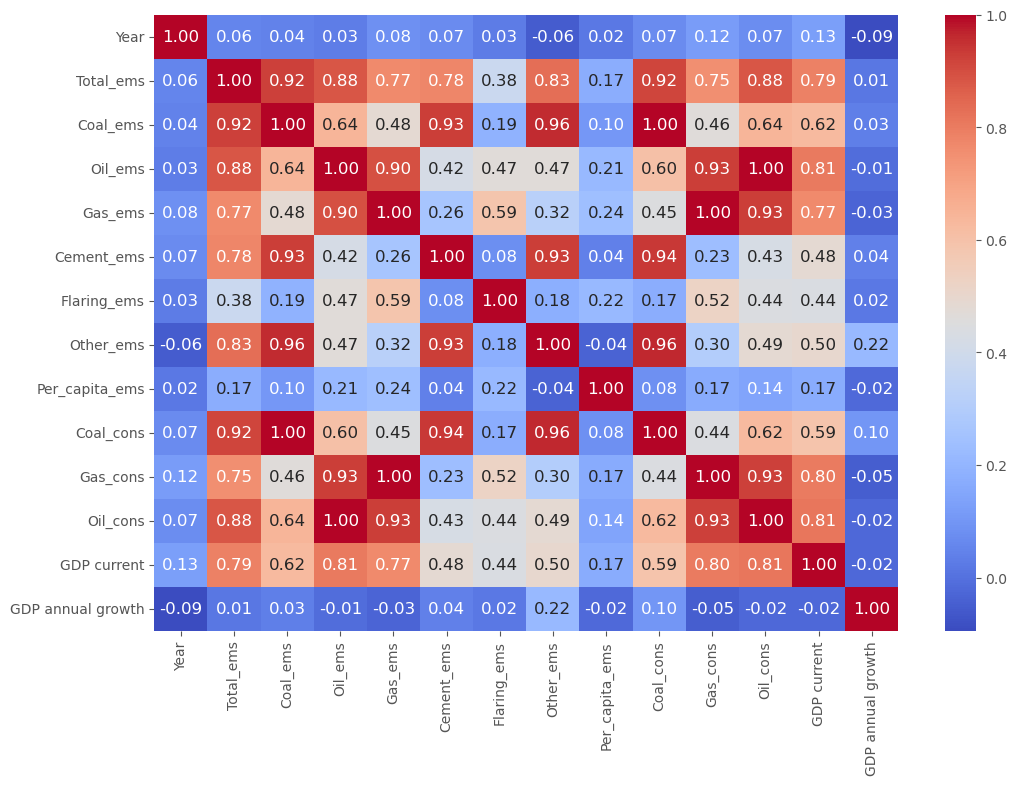

In [24]:
numeric_df = merged_df.select_dtypes(include=['number'])

# Compute correlations using only numeric columns
correlation_matrix = numeric_df.corr(method='pearson')
    
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
        annot_kws={"size": 12}, xticklabels=1, yticklabels=1)

In [25]:
merged_df.corr()

,Year,Total_ems,Coal_ems,Oil_ems,Gas_ems,Cement_ems,Flaring_ems,Other_ems,Per_capita_ems,Coal_cons,Gas_cons,Oil_cons,GDP current,GDP annual growth
Year,1.000000,0.055379,0.043627,0.033770,0.084654,0.069584,0.029207,-0.055393,0.017792,0.071457,0.115866,0.073992,0.127784,-0.094089
Total_ems,0.055379,1.000000,0.923629,0.881399,0.766987,0.775402,0.380294,0.830379,0.174995,0.915837,0.754723,0.881227,0.788906,0.013440
Coal_ems,0.043627,0.923629,1.000000,0.643897,0.483631,0.931348,0.191396,0.957313,0.103594,0.998769,0.461942,0.641932,0.624699,0.034795
Oil_ems,0.033770,0.881399,0.643897,1.000000,0.897336,0.420955,0.466697,0.469094,0.213801,0.602805,0.930701,0.996574,0.805260,-0.009706
Gas_ems,0.084654,0.766987,0.483631,0.897336,1.000000,0.262528,0.586186,0.319414,0.235832,0.445865,0.999131,0.928807,0.767331,-0.034187
Cement_ems,0.069584,0.775402,0.931348,0.420955,0.262528,1.000000,0.080520,0.931327,0.039850,0.937886,0.233753,0.426232,0.484659,0.040046
Flaring_ems,0.029207,0.380294,0.191396,0.466697,0.586186,0.080520,1.000000,0.179016,0.215955,0.172462,0.522675,0.440492,0.439025,0.019345
Other_ems,-0.055393,0.830379,0.957313,0.469094,0.319414,0.931327,0.179016,1.000000,-0.037730,0.962283,0.301716,0.486153,0.499250,0.217762
Per_capita_ems,0.017792,0.174995,0.103594,0.213801,0.235832,0.039850,0.215955,-0.037730,1.000000,0.081735,0.166131,0.142357,0.167959,-0.021076
Coal_cons,0.071457,0.915837,0.998769,0.602805,0.445865,0.937886,0.172462,0.962283,0.081735,1.000000,0.440165,0.624032,0.591571,0.101054


**Answer 1**: 
The correlation analysis indicates compelling evidence that CO2 emissions are influenced by both energy consumption and GDP. Notably, the consumption of Coal, Gas, and Oil demonstrates a near-perfect correlation with emissions in each respective category. Additionally, there exists a robust positive correlation between the emissions and consumption of Coal, Oil, and Gas. Furthermore, a strong positive correlation is observed between current GDP and total emissions, whereas no correlation is evident with annual GDP. In summary, the analysis affirms that there is indeed a strong relationship between CO2 emissions, GDP, and energy consumption.

**Question 2**: What country had the highest emissions each year from 1965 to 2021?

In [26]:
max_emission_country = emissions_df.loc[emissions_df.groupby('Year')['Total_ems'].idxmax(), ['Year', 'Country']]
print(max_emission_country.head(60))


       Year        Country
60055  1965  United States
60056  1966  United States
60057  1967  United States
60058  1968  United States
60059  1969  United States
60060  1970  United States
60061  1971  United States
60062  1972  United States
60063  1973  United States
60064  1974  United States
60065  1975  United States
60066  1976  United States
60067  1977  United States
60068  1978  United States
60069  1979  United States
60070  1980  United States
60071  1981  United States
60072  1982  United States
60073  1983  United States
60074  1984  United States
60075  1985  United States
60076  1986  United States
60077  1987  United States
60078  1988  United States
60079  1989  United States
60080  1990  United States
60081  1991  United States
60082  1992  United States
60083  1993  United States
60084  1994  United States
60085  1995  United States
60086  1996  United States
60087  1997  United States
60088  1998  United States
60089  1999  United States
60090  2000  United States
6

**Answer 2**: 
Initially, emissions were primarily shared between the United States and China. The United States held the top position as the highest emitter from 1965 to 2005. Subsequently, China emerged as the leading emitter from 2006 to 2009, then again from 2011 to 2014, and continuously since 2020. Remarkably, the United States maintained its position at the top for 40 years, a notable revelation.

**Question 3**: Which type of energy, Coal, Gas, or Oil, has had the highest contribution to both global energy consumption and CO2 emissions from 1965 to 2021?

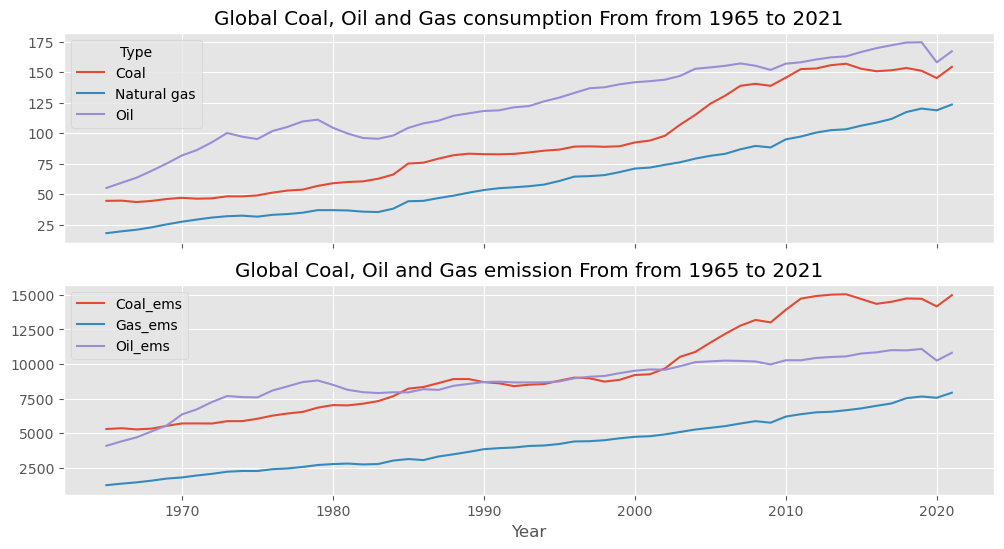

In [27]:
df1 = energy_consumption_df[energy_consumption_df['Type'].isin(['Coal', 'Oil', 'Natural gas'])]
df1 = df1.groupby(['Year', 'Type'])['Energy_consumption_exj'].sum().unstack()

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 6), sharex=True)

df1.plot(kind='line', ax=ax[0])
ax[0].set_title("Global Coal, Oil and Gas consumption From from 1965 to 2021")

df2 = emissions_df.groupby('Year')['Coal_ems','Gas_ems', 'Oil_ems'].sum()

df2.plot(kind='line', ax=ax[1])
ax[1].set_title("Global Coal, Oil and Gas emission From from 1965 to 2021")

# Show the plot
plt.show()

**Answer 3**: From the plots above, it's evident that natural gas has consistently been the lowest contributor in terms of both consumption and CO2 emissions compared to coal and oil. The top plot illustrates that oil consumption has remained consistently high from 1965 to 2021. However, the bottom plot reveals a fluctuating trend shared between coal and oil, with coal consumption taking the lead from the early 2000s until 2021. Overall, both plots indicate a significant increase in both consumption and emissions from 1965 to 2021.

**Question 4**: Is there a connection between Gross Domestic Product (GDP) and CO2 emissions?

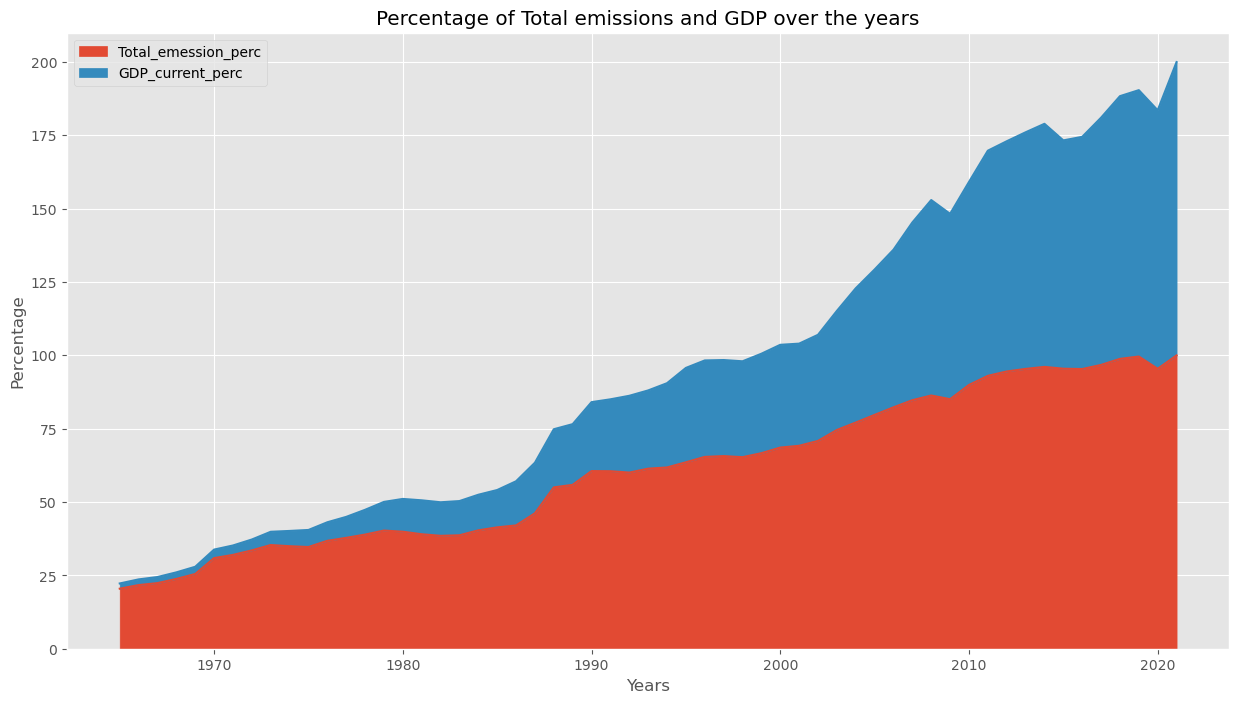

In [28]:
# Merge the emissions and GDP DataFrames based on the 'Year' column
merged_ems_gdp_df = pd.merge(emissions_df[['Year','Code','Total_ems']], 
                             gdp_df[['Year','Code','GDP current']], 
                             on=['Year','Code'])
grouped_df = merged_ems_gdp_df.groupby('Year').sum().reset_index()

# Calculate the maximum values for 'Total_ems' and 'GDP current'
max_total_ems = grouped_df['Total_ems'].max()
max_gdp_current = grouped_df['GDP current'].max()

# Convert 'Total_ems' and 'GDP current' to percentages based on the maximum values
grouped_df['Total_emession_perc'] = (grouped_df['Total_ems'] / max_total_ems) * 100
grouped_df['GDP_current_perc'] = (grouped_df['GDP current'] / max_gdp_current) * 100

# Plot the DataFrame
grouped_df.plot(x='Year', y=['Total_emession_perc', 'GDP_current_perc'], kind='area', figsize=(15, 8))
plt.title("Percentage of Total emissions and GDP over the years")
plt.xlabel("Years")
plt.ylabel("Percentage")
plt.show()

**Answer 4**: The plot illustrates a strong relation between CO2 emissions and Gross Domestic Product (GDP). There's a noticeable increase in both variables over time. 

As we observed previously in the heatmap matrix plot from the first question, it revealed a strong positive correlation of 0.79 between the current GDP and total emissions.

**Question 5**: Between 2000 and 2021, what European country had the highest per capita emissions?

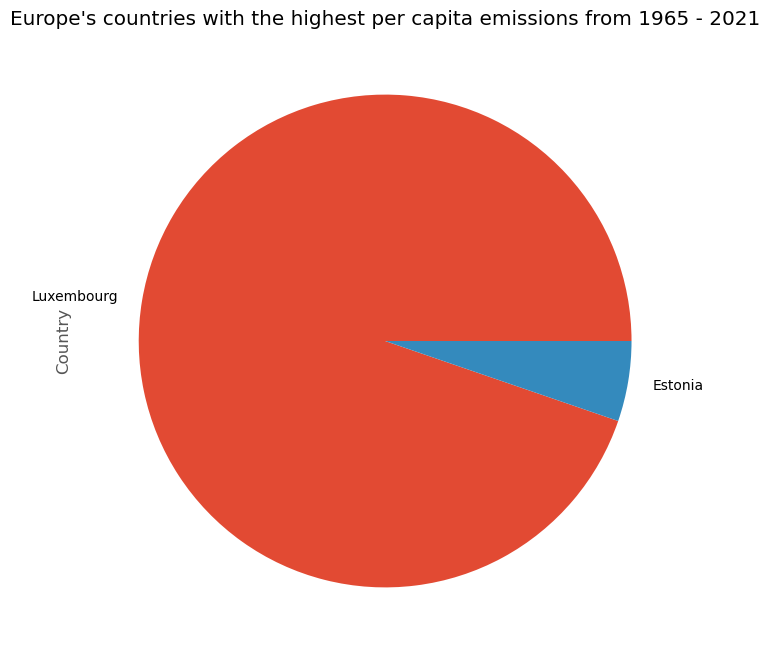

In [29]:

# Filter the dataset to include only Region = Europe
europe_data = energy_consumption_df[energy_consumption_df['Region'] == 'Europe']

# Group by Year and find the row with the maximum Per Capita emissions for each year
max_per_capita_emissions_europe = emissions_df.merge(europe_data, on=['Country', 'Year'])
max_per_capita_emissions_europe = max_per_capita_emissions_europe.groupby('Year').apply(lambda x: x.loc[x['Per_capita_ems'].idxmax()])
s = max_per_capita_emissions_europe['Country'].value_counts()
s.plot(kind='pie')
plt.title("Europe's countries with the highest per capita emissions from 1965 - 2021")
plt.show()

In [30]:
max_per_capita_emissions_by_country = max_per_capita_emissions_europe.groupby('Country')['Per_capita_ems'].max()
print(max_per_capita_emissions_by_country)

Country
Estonia       25.446324
Luxembourg    41.048885
Name: Per_capita_ems, dtype: float64


**Answer 5**: From the plot, it's shows that Luxembourg consistently had the highest amount of CO2 emissions per capita in Europe, followed by Estonia. Luxembourg's maximum per capita emissions value from 1965 to 2021 was 41.048885, while Estonia achieved a maximum per capita value of 25.446324.


**Question 6**: Which countries have consistently ranked among the top 20 in terms of energy consumption and CO2 emissions over time?

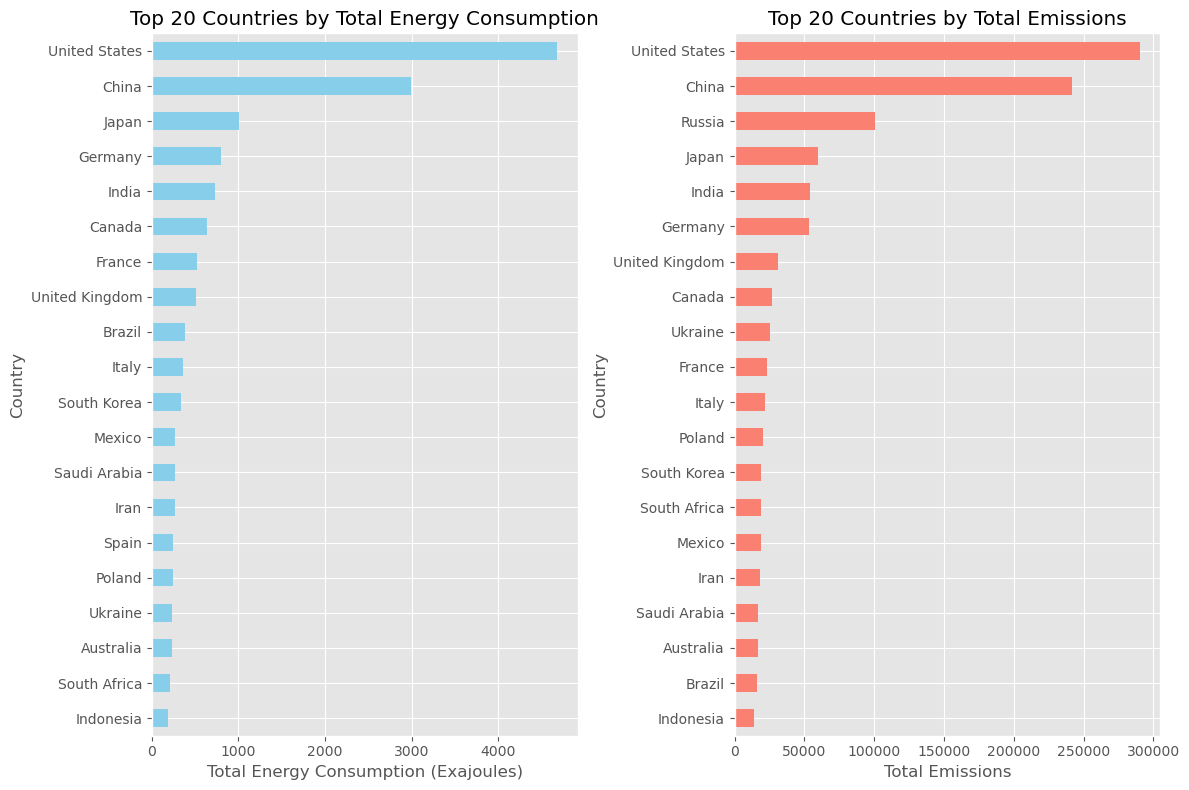

In [31]:
import matplotlib.pyplot as plt

# Grouping by country and summing up the energy consumption
energy_consumption_by_country = energy_consumption_df.groupby('Country')['Energy_consumption_exj'].sum()

# Grouping by country and summing up the emissions
emissions_by_country = emissions_df.groupby('Country')['Total_ems'].sum()

# Selecting the top 20 countries by energy consumption and sorting
top_20_energy_countries = energy_consumption_by_country.nlargest(20)

# Selecting the top 20 countries by emissions and sorting
top_20_emissions_countries = emissions_by_country.nlargest(20)

# Creating subplots
fig, (ax1, ax2) = plt.subplots(1, 2)

# Plotting the top 20 countries by energy consumption
top_20_energy_countries.sort_values().plot(kind='barh', ax=ax1, color='skyblue')
ax1.set_title("Top 20 Countries by Total Energy Consumption")
ax1.set_xlabel("Total Energy Consumption (Exajoules)")
ax1.set_ylabel("Country")
ax1.tick_params(axis='y', rotation=0)  # Rotate y-axis labels for better visibility

# Plotting the top 20 countries by emissions
top_20_emissions_countries.sort_values().plot(kind='barh', ax=ax2, color='salmon')
ax2.set_title("Top 20 Countries by Total Emissions")
ax2.set_xlabel("Total Emissions")
ax2.set_ylabel("Country")
ax2.tick_params(axis='y', rotation=0)  # Rotate y-axis labels for better visibility

plt.tight_layout()
plt.show()


**Answer 6**: The United States and China hold the top positions in both energy consumption and CO2 emissions, with Indonesia ranking lowest in both categories.

***Question 7**: Which energy sources have shown the most significant changes in mean carbon emissions over time?

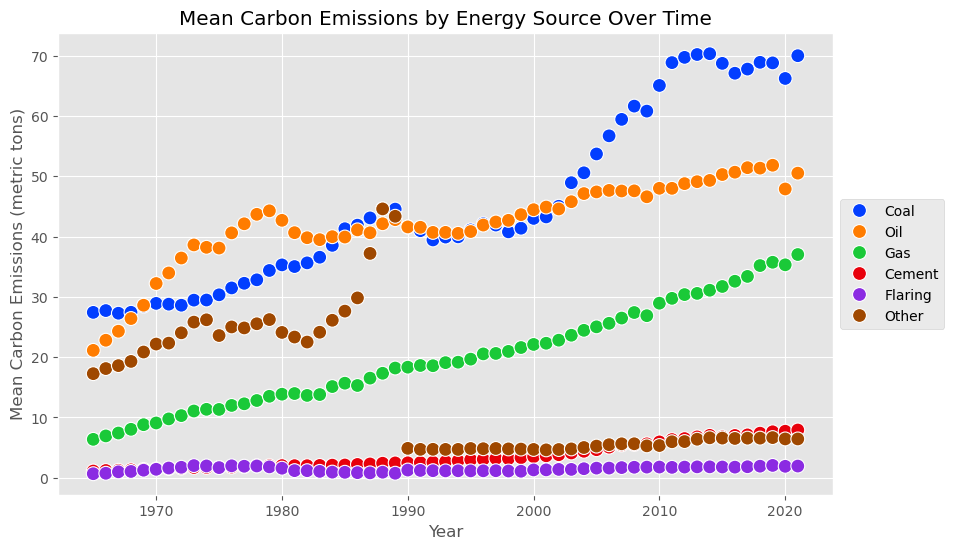

In [32]:
# Group the data by 'Year' and calculate the mean carbon emissions for each energy source
mean_emissions_by_year = emissions_df.groupby('Year')[['Coal_ems', 'Oil_ems', 'Gas_ems', 'Cement_ems', 'Flaring_ems', 'Other_ems']].mean().reset_index()

# Melt the DataFrame to long format for Seaborn
mean_emissions_by_year_melted = mean_emissions_by_year.melt(id_vars='Year', var_name='Energy Source', value_name='Mean Carbon Emissions')

mean_emissions_by_year_melted['Energy Source'].replace(
    ['Coal_ems', 'Oil_ems', 'Gas_ems', 'Cement_ems', 'Flaring_ems', 'Other_ems' ],
    ['Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Other'], inplace=True)
    
# Plotting the scatter plot with Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mean_emissions_by_year_melted, x='Year', y='Mean Carbon Emissions', hue='Energy Source', palette='bright', s=100)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Mean Carbon Emissions (metric tons)')
plt.title('Mean Carbon Emissions by Energy Source Over Time')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Add legend to show the energy sources

plt.grid(True)
plt.show()


**Answer 7**: The chart shows how much CO2 different energy sources release over time. Cement and Flaring don't emit much CO2, staying under 10 metric tons. But there's an energy source called "Others" that's a bit mysterious. It used to be a big emitter, even more than Coal and Oil in the late 1980s, hitting 45 metric tons. Then, something happened in 1990, and its emissions dropped sharply to just 5 metric tons, where they've stayed since. Coal and Oil, on the other hand, have had a fluctuating trend, with their emissions going up and down over the years. Despite these fluctuations, they consistently remain the highest emitters of CO2 throughout the entire period. Gas emissions, on the other hand, have gone up steadily from 1965 to 2021, consistently positioning it in the middle between the two highest emitters (Coal and Oil) and the two lowest emitters (Cement and Flaring).

**Question 8**: Which Region had the highest energy consumption throughout the entire period ?

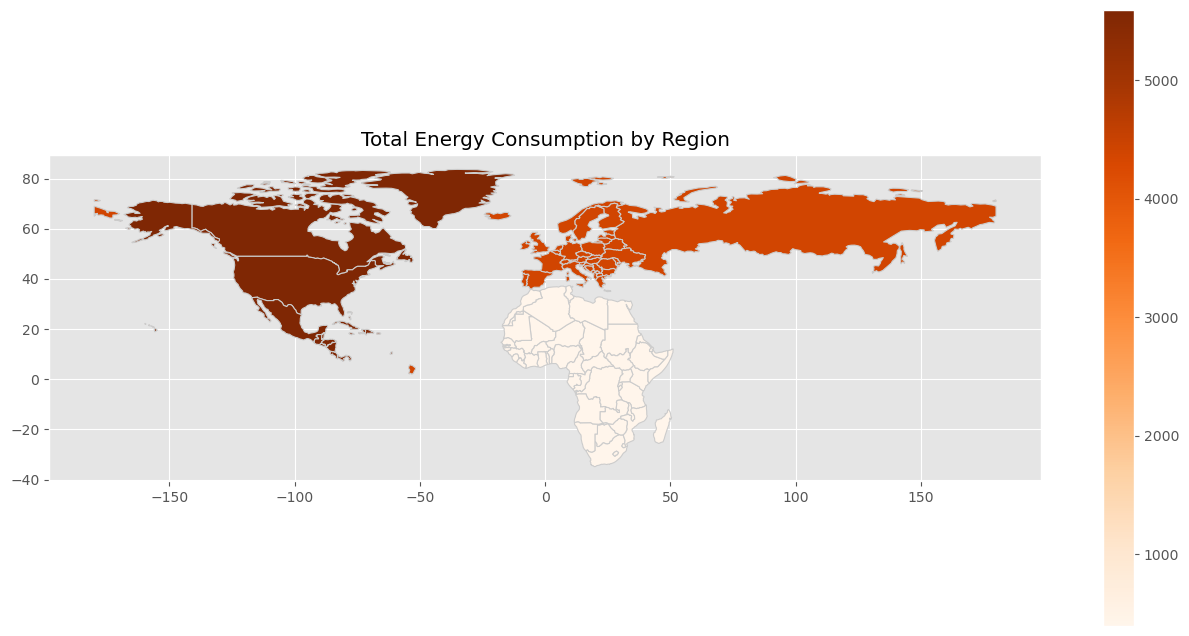

In [33]:
# Grouping by continent and summing up the energy consumption
continent_energy = energy_consumption_df.groupby('Region')['Energy_consumption_exj'].sum().reset_index()

# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merging the world map with the energy consumption data
merged = world.merge(continent_energy, how='left', left_on='continent', right_on='Region')

# Plotting the world map
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
merged.plot(column='Energy_consumption_exj', cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Total Energy Consumption by Region')
plt.show()


**Answer 8**: The visualization illustrates that North America has consistently exhibited the highest energy consumption levels from 1965 to 2021, with Asia Pacific ranking second and Africa registering the lowest energy consumption levels over the same period.

# Summary

In summary, the analyses reveal a consistent increase in carbon dioxide emissions since the 1960s, largely driven by human activities associated with the utilization of various energy sources across industries and economic growth. Unfortunately, the results do not indicate significant progress in reducing CO2 emissions. Notably, regions with higher levels of industrialization and economic development tend to rely more heavily on these energy sources, resulting in higher levels of CO2 emissions.

While there is growing global awareness of this issue, the current efforts may not be sufficient to address it adequately. More proactive measures are needed to tackle this problem and minimize its adverse effects. It's important to recognize that this issue not only poses a threat to the environment but also to human well-being.

# References

Voulvoulis, N Tchounwou, P 2023, *The Relationship between Energy Consumption, CO2 Emissions, Economic Growth, and Health Indicators*. National Library of Medicine, accessed 19 Apr 2024, <https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9915105/>. 


Zou, S Zhang, T 2020, *Advanced Intelligent Technologies in Energy Forecasting and Economical Applications*. hindawi, accessed 10 Apr 2024, <https://www.hindawi.com/journals/mpe/2020/8842770/>.